<a href="https://colab.research.google.com/github/FeedingDejaj/MAT421/blob/main/ModHpt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 22.1 ODE Initial Value Problem Statement

- An **ordinary differential equation (ODE)** relates a function f(x), its independent variable x, and its derivatives:  
  F(x, f, f′, …, f⁽ⁿ⁻¹⁾) = f⁽ⁿ⁾(x).  
- The **order** of an ODE is the highest derivative present.  
- An **initial value problem** (IVP) specifies the values of f and its first n–1 derivatives at a point x₀:  
  f⁽ʲ⁾(x₀) = αⱼ, for j = 0, 1, …, n–1.  
- Under suitable conditions, an IVP has a **unique** particular solution that satisfies both the ODE and those initial conditions.  


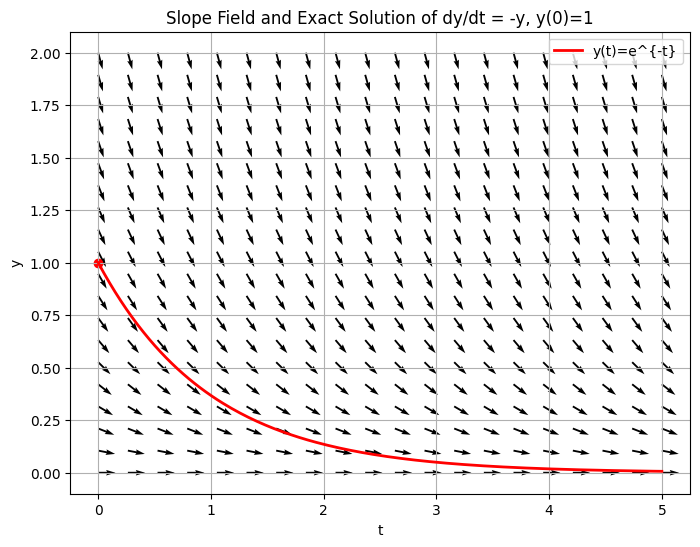

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the right-hand side of the ODE: dy/dt = -y
def f(t, y):
    return -y

# Analytical solution for the IVP y(0)=1
def y_exact(t):
    return np.exp(-t)

# Create a grid for the slope field
t_vals = np.linspace(0, 5, 20)
y_vals = np.linspace(0, 2, 20)
T, Y = np.meshgrid(t_vals, y_vals)
U = 1  # delta t for arrows
V = f(T, Y)  # slope dy/dt

N = np.sqrt(U**2 + V**2)
U2, V2 = U/N, V/N

plt.figure(figsize=(8,6))
plt.quiver(T, Y, U2, V2, angles='xy')
t_plot = np.linspace(0, 5, 200)
plt.plot(t_plot, y_exact(t_plot), 'r-', linewidth=2, label='y(t)=e^{-t}')
plt.scatter(0, 1, color='red')  # initial point
plt.xlabel('t')
plt.ylabel('y')
plt.title('Slope Field and Exact Solution of dy/dt = -y, y(0)=1')
plt.legend()
plt.grid(True)
plt.show()




---



# 22.2 Reduction of Order

- To apply first-order ODE solvers to higher-order equations, introduce a **state vector**  
  S(t) = [f, f′, f″, …, f⁽ⁿ⁻¹⁾]ᵀ  
- Then  
  dS/dt = [f′, f″, …, F(t, f, f′, …, f⁽ⁿ⁻¹⁾)]ᵀ = 𝓕(t, S)  
  converts one n-th order ODE into n coupled first-order ODEs.  
- Example: small-angle pendulum f″ + (g/l) f = 0 becomes  
  S = [θ, ω]ᵀ, dS/dt = [ω, –(g/l) θ]ᵀ  
- This reduction lets us use general-purpose solvers (Euler, RK4, etc.) on any order equation.


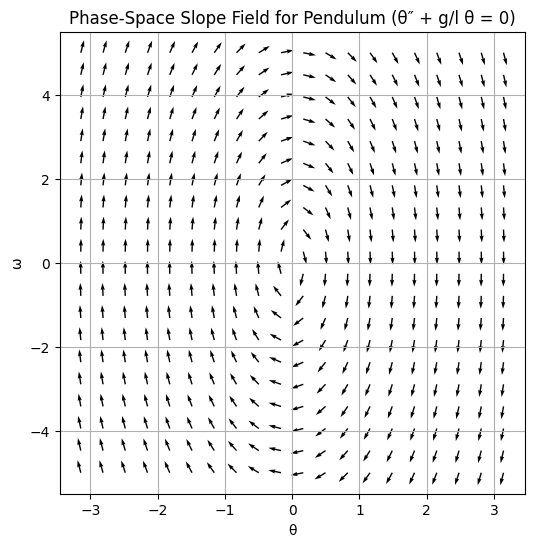

In [3]:
import numpy as np
import matplotlib.pyplot as plt

g, l = 9.81, 1.0
theta_vals = np.linspace(-np.pi, np.pi, 20)
omega_vals = np.linspace(-5, 5, 20)
T, W = np.meshgrid(theta_vals, omega_vals)
U = W
V = - (g/l) * T
N = np.sqrt(U**2 + V**2)
U2, V2 = U/N, V/N

plt.figure(figsize=(6,6))
plt.quiver(T, W, U2, V2, angles='xy')
plt.xlabel('θ')
plt.ylabel('ω')
plt.title('Phase-Space Slope Field for Pendulum (θ″ + g/l θ = 0)')
plt.grid(True)
plt.show()




---



# 22.3 The Euler Method

- **Euler’s Method:** A first‐order explicit time‐stepping scheme for  
  dy/dt = f(t,y), y(t₀)=y₀:  
  y_{n+1} = y_n + h·f(t_n, y_n)  
- **Local truncation error** is O(h²); **global error** is O(h).  
- Simple to implement but requires small step sizes for accuracy and stability.  



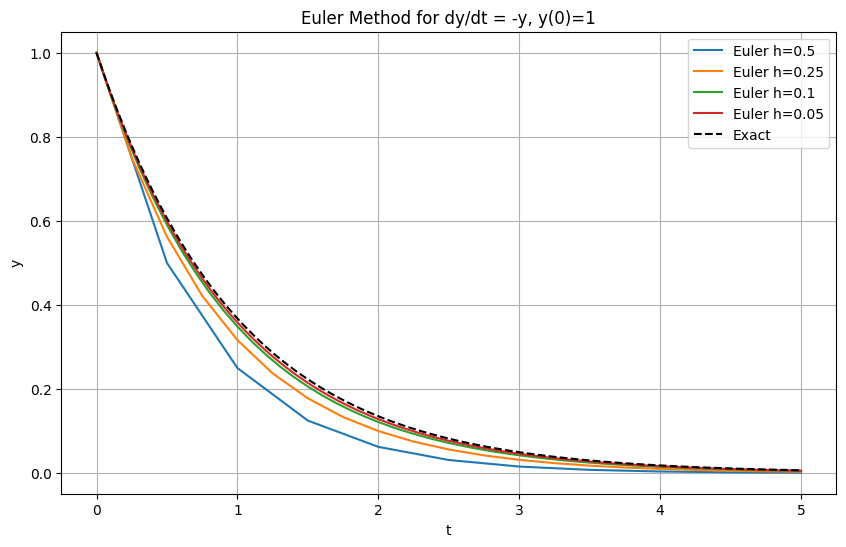

In [4]:
import numpy as np
import matplotlib.pyplot as plt

f = lambda t, y: -y
t0, y0 = 0.0, 1.0
T = 5.0
hs = [0.5, 0.25, 0.1, 0.05]
t_exact = np.linspace(t0, T, 200)
y_exact = np.exp(-t_exact)

plt.figure(figsize=(10,6))
for h in hs:
    N = int((T - t0) / h)
    t = np.linspace(t0, T, N+1)
    y = np.empty(N+1)
    y[0] = y0
    for n in range(N):
        y[n+1] = y[n] + h * f(t[n], y[n])
    plt.plot(t, y, label=f"Euler h={h}")
plt.plot(t_exact, y_exact, 'k--', label="Exact")
plt.xlabel('t')
plt.ylabel('y')
plt.title("Euler Method for dy/dt = -y, y(0)=1")
plt.legend()
plt.grid(True)
plt.show()
